# Independent Component Analysis Lab

In this notebook, we'll use Independent Component Analysis to retrieve original signals from three observations each of which contains a different mix of the original signals. This is the same problem explained in the ICA video.

In [1]:
import numpy as np
import wave
from IPython.core.display import HTML
import matplotlib.pyplot as plt

In [2]:
# this is a wrapper that take a filename and publish an html <audio> tag to listen to it

def wavPlayer(filepath):
    """ will display html 5 player for compatible browser

    Parameters :
    ------------
    filepath : relative filepath with respect to the notebook directory ( where the .ipynb are not cwd)
               of the file to play

    The browser need to know how to play wav through html5.

    there is no autoplay to prevent file playing when the browser opens
    """
    
    src = """
    <head>
    <meta http-equiv="Content-Type" content="text/html; charset=utf-8">
    <title>Simple Test</title>
    </head>
    
    <body>
    <audio controls="controls" style="width:600px" >
      <source src="files/%s" type="audio/wav" />
      Your browser does not support the audio element.
    </audio>
    </body>
    """%(filepath)
    display(HTML(src))

# Data Exploration

Let's peak at the parameters of the wave file to learn more about it

In [3]:
# Read the wave file
mix_1_wave = wave.open('./data/mix1.wav','r')
mix_1_wave.getparams()

_wave_params(nchannels=1, sampwidth=2, framerate=44100, nframes=264515, comptype='NONE', compname='not compressed')

So this file has only channel (so it's mono sound). It has a frame rate of 44100, which means each second of sound is represented by 44100 integers (integers because the file is in the common PCM 16-bit format). The file has a total of 264515 integers/frames, which means its length in seconds is:

In [4]:
264515/44100

5.998072562358277

Let's extract the frames of the wave file, which will be a part of the dataset we'll run ICA against:

In [5]:
from scipy.io import wavfile
frame_rate, x1 = wavfile.read('./data/mix1.wav')

In [6]:
x1

array([  879,  1268,  1460, ...,  9204,  9553, 10006], dtype=int16)

signal_1 is now a list of ints representing the sound contained in the first file.

In [7]:
'length: ', len(x1) , 'first 100 elements: ',x1[:100]

('length: ',
 264515,
 'first 100 elements: ',
 array([  879,  1268,  1460,  1756,  1943,  2216,  2407,  2668,  2866,
         3106,  3308,  3546,  3752,  3981,  4175,  4395,  4588,  4790,
         4966,  5146,  5292,  5436,  5550,  5643,  5717,  5759,  5790,
         5798,  5789,  5756,  5713,  5649,  5576,  5478,  5381,  5267,
         5146,  4999,  4856,  4682,  4502,  4308,  4097,  3875,  3637,
         3380,  3107,  2825,  2514,  2194,  1847,  1472,  1087,   671,
          227,  -219,  -691, -1176, -1666, -2167, -2669, -3179, -3668,
        -4170, -4643, -5116, -5559, -5985, -6380, -6765, -7105, -7422,
        -7706, -7955, -8163, -8339, -8470, -8557, -8600, -8618, -8585,
        -8524, -8425, -8298, -8129, -7947, -7720, -7475, -7205, -6916,
        -6606, -6266, -5922, -5556, -5165, -4774, -4353, -3922, -3476,
        -3021], dtype=int16))

If we plot this array as a line graph, we'll get the familiar wave form representation:

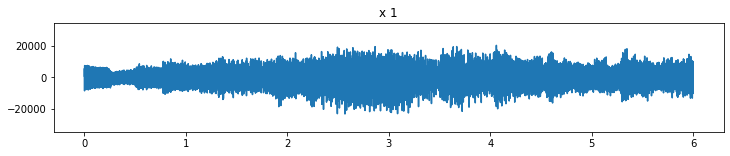

In [8]:
fs = mix_1_wave.getframerate()
timing = np.linspace(0, len(x1)/fs, num=len(x1))


plt.figure(figsize=(12,2))
plt.title('x 1')
plt.plot(timing,x1)
plt.ylim(-35000, 35000)
plt.show()

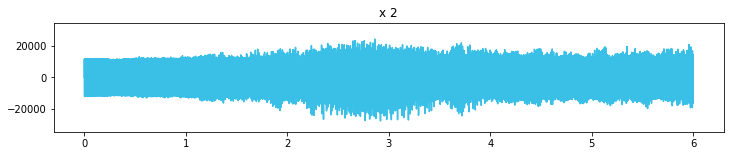

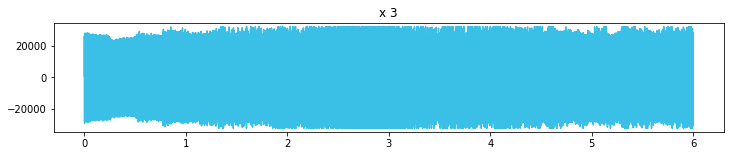

In [9]:
mix_2_wave = wave.open('./data/mix2.wav','r')
mix_3_wave = wave.open('./data/mix3.wav','r')

#Extract Raw Audio from Wav File
signal_raw_2, x2 = wavfile.read('./data/mix2.wav')
signal_raw_3, x3 = wavfile.read('./data/mix3.wav')

plt.figure(figsize=(12,2))
plt.title('x 2')
plt.plot(timing,x2, c="#3ABFE7")
plt.ylim(-35000, 35000)
plt.show()
plt.figure(figsize=(12,2))
plt.title('x 3')
plt.plot(timing,x3, c="#3ABFE7")
plt.ylim(-35000, 35000)
plt.show()

In [10]:
wavPlayer("./data/mix1.wav")

In [11]:
wavPlayer("./data/mix2.wav")

In [12]:
wavPlayer("./data/mix3.wav")

## Zip all the mixed signals and call it X matrx

In [13]:
X = list(zip(x1, x2, x3))

# ICA for audio separation

We are now ready to run ICA to try to retrieve the original signals.

* Import sklearn's [FastICA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FastICA.html) module
* Initialize FastICA look for three components
* Run the FastICA algorithm using fit_transform on dataset X

In [14]:
# Import FastICA
from sklearn.decomposition import FastICA
ica = FastICA(n_components = 3)
ica_result = ica.fit_transform(X)

In [15]:
ica_result.shape

(264515, 3)

Let's split into separate signals and look at them

In [16]:
s1 = ica_result[:,0]
s2 = ica_result[:,1]
s3 = ica_result[:,2]

Let's plot to see how the wave forms look

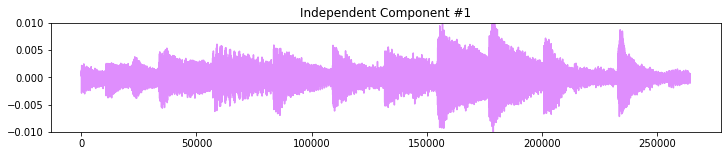

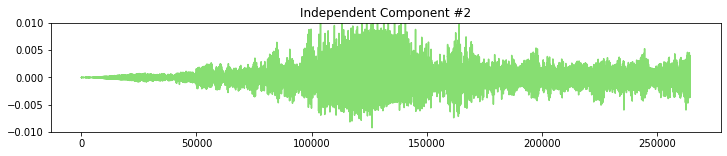

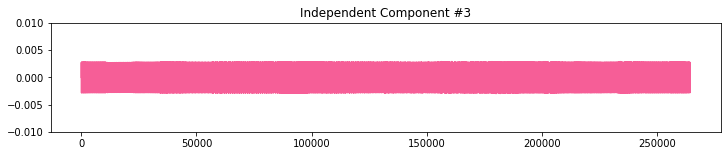

In [17]:
# Plot Independent Component #1
plt.figure(figsize=(12,2))
plt.title('Independent Component #1')
plt.plot(s1, c="#df8efd")
plt.ylim(-0.010, 0.010)
plt.show()

# Plot Independent Component #2
plt.figure(figsize=(12,2))
plt.title('Independent Component #2')
plt.plot(s2, c="#87de72")
plt.ylim(-0.010, 0.010)
plt.show()

# Plot Independent Component #3
plt.figure(figsize=(12,2))
plt.title('Independent Component #3')
plt.plot(s3, c="#f65e97")
plt.ylim(-0.010, 0.010)
plt.show()

# Now listen to the separated audio
The best way to confirm the result is to listen to resulting files. So let's save as wave files and verify. But before we do that, we'll have to:
* convert them to integer (so we can save as PCM 16-bit Wave files), otherwise only some media players would be able to play them and others won't
* Map the values to the appropriate range for int16 audio. That range is between -32768 and +32767. A basic mapping can be done by multiplying by 32767.
* The sounds will be a little faint, we can increase the volume by multiplying by a value like 100

In [18]:
from scipy.io import wavfile

# Convert to int, map the appropriate range, and increase the volume a little bit
s1_int = np.int16(s1*32767*100)
s2_int = np.int16(s2*32767*100)
s3_int = np.int16(s3*32767*100)


# Write wave files
wavfile.write("s1.wav", fs, s1_int)
wavfile.write("s2.wav", fs, s2_int)
wavfile.write("s3.wav", fs, s3_int)

In [19]:
wavPlayer("s1.wav")

In [20]:
wavPlayer("s2.wav")

In [21]:
wavPlayer("s3.wav")